# **Advanced Data Exploration and Preparation for Flight Price Prediction**

## Explanation of EDA and Data Cleaning

**Exploratory Data Analysis (EDA)** is a crucial step in data science that involves analyzing and investigating data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. EDA helps to:
- Understand the data’s underlying patterns, relationships, and anomalies.
- Inform the development of appropriate models for analysis.
- Identify key variables that are significant in determining the conclusions.

**Data Cleaning** is another essential process, which involves preparing the raw data for analysis by removing or correcting data that is incorrect, incomplete, duplicated, or improperly formatted. This step is vital because the accuracy and effectiveness of the output depend largely on the quality of the data. Data Cleaning helps to:
- Improve the data quality, ensuring accuracy, completeness, and consistency.
- Enhance the efficiency of the analysis by removing noise and unnecessary data.
- Prevent data-driven errors in modeling and decision-making.

## Project Introduction

This project focuses on an Exploratory Data Analysis and Data Cleaning of a flights dataset. Through a series of structured steps, the project aims to prepare the dataset thoroughly for further analysis, which might involve predictive modeling or insights generation for business strategies.

## Project Objectives

Based on the operations and explorations seen in the notebook, the objectives of this project can be summarized as:
1. **Data Understanding**: Gain a comprehensive understanding of the features within the dataset, their characteristics, and the data types they encompass.
2. **Data Cleansing**: Tackle issues such as missing values, duplicates, and incorrect data entries to refine the dataset.
3. **Feature Engineering**: Develop new features from existing data to better capture the underlying patterns for future analysis, such as breaking down date and time into more actionable components.
4. **Outlier Detection and Treatment**: Identify and address outliers in the dataset to prevent skewing the analysis results.
5. **Normalization**: Normalize skewed data distributions to align them more closely with a normal distribution, aiding in more effective statistical analysis and modeling.
6. **Preparation for Advanced Analysis**: Prepare the dataset for potential advanced analysis, such as clustering or predictive modeling, by ensuring data quality and structure.

## Conclusion

The notebook effectively demonstrates the preliminary steps required to prepare a dataset for in-depth analysis. Through EDA, we have identified key characteristics and distributions within the data. The subsequent cleaning and preprocessing steps, such as outlier filtering and feature engineering, ensure the data is optimized for further analysis. This groundwork is crucial for any subsequent modeling or business analysis, setting a strong foundation for accurate and reliable insights.

# 1. Import Libraries

In [ ]:
# Importing essential Python libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn).
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Dataset
df_flights = pd.read_csv("flights.csv")

# 2. Data Structure

In [ ]:
#Shows the number of rows and columns in the DataFrame.
df_flights.shape

(10683, 10)

In [ ]:
#Provides concise information about the DataFrame, including number of non-null entries and data types of columns.
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            10683 non-null  int64 
 1   Airline          10683 non-null  object
 2   Date_of_Journey  10683 non-null  object
 3   Source           10683 non-null  object
 4   Destination      10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 834.7+ KB


In [ ]:
#Displays the first few rows of the DataFrame to get an overview of the data and columns.
df_flights.head()

,index,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890
1,1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744
2,2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992
3,3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
4,4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735


In [ ]:
#Lists the data types of all columns in the DataFrame.
df_flights.dtypes

index               int64
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Dep_Time           object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
#Outputs statistical details like percentile, mean, std etc. of the DataFrame.
df_flights.describe()

,index,Price
count,10683.000000,10683.000000
mean,5341.000000,9087.064121
std,3084.060797,4611.359167
min,0.000000,1759.000000
25%,2670.500000,5277.000000
50%,5341.000000,8372.000000
75%,8011.500000,12373.000000
max,10682.000000,79512.000000


### We removed the *index* variable because we observed that it corresponds only to an enumeration of the records.

In [ ]:
#Removes the 'index' column from the DataFrame.
df_flights.drop(columns = 'index', inplace = True)

# 3. Nulls Detection

In [ ]:
# Calculates the number of missing values in each column and filters out columns with missing values.
null_cols = df_flights.isnull().sum()

In [ ]:
null_cols[null_cols > 0]

Total_Stops    1
dtype: int64

### For the variable where we want to impute missing values, we will look at the type of information it contains, and then impute the missing values based on what we see.

In [ ]:
#Shows the unique values in the 'Total_Stops' column.
df_flights['Total_Stops'].unique()

array(['1 stop', '2 stops', '3 stops', 'non-stop', '4 stops', nan],
      dtype=object)

In [ ]:
#Replaces missing values in the 'Total_Stops' column with 'unknown'.
df_flights['Total_Stops'].fillna('unknown', inplace = True)

# 4. Identify Duplicate Rows

In [ ]:
#Finds duplicate rows in the DataFrame.
df_flights[df_flights.duplicated(keep=False)]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
71,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135
235,Air India,2019-01-04,Kolkata,Banglore,10:00,15h 20m,2 stops,No info,10408
362,Air India,2019-01-04,Kolkata,Banglore,10:00,15h 20m,2 stops,No info,10408
456,Air India,2019-01-05,Kolkata,Banglore,9:50,23h 5m,2 stops,No info,13227
...,...,...,...,...,...,...,...,...,...
10478,Jet Airways,2019-12-06,Delhi,Cochin,5:30,13h 30m,2 stops,In-flight meal not included,10368
10481,Jet Airways,2019-12-06,Delhi,Cochin,5:30,13h 30m,2 stops,No info,13014
10553,Air India,2019-12-06,Delhi,Cochin,22:00,21h 15m,2 stops,No info,10231
10638,Jet Airways,2019-12-06,Delhi,Cochin,9:40,18h 45m,2 stops,In-flight meal not included,10368


In [ ]:
#Removes duplicate rows from the DataFrame.
df_flights.drop_duplicates(inplace = True)

In [ ]:
df_flights[df_flights.duplicated(keep = False)]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price


# 5. Univariable Analysis

In [ ]:
for i in df_flights.columns:
    print('\n',i,df_flights[i].unique(),'\n')


 Airline ['Jet Airways' 'SpiceJet' 'Air India' 'IndiGo' 'Air Asia' 'Vistara'
 'GoAir' 'Jet Airways Business' 'Multiple carriers'
 'Vistara Premium economy' 'Multiple carriers Premium economy' 'Trujet'] 


 Date_of_Journey ['2019-01-03' '2019-01-04' '2019-01-05' '2019-01-06' '2019-03-03'
 '2019-03-04' '2019-03-05' '2019-03-06' '2019-03-15' '2019-03-18'
 '2019-03-21' '2019-03-24' '2019-03-27' '2019-04-15' '2019-04-18'
 '2019-04-21' '2019-04-24' '2019-04-27' '2019-05-15' '2019-05-18'
 '2019-05-21' '2019-05-24' '2019-05-27' '2019-06-03' '2019-06-04'
 '2019-06-05' '2019-06-06' '2019-06-15' '2019-06-18' '2019-06-21'
 '2019-06-24' '2019-06-27' '2019-09-03' '2019-09-04' '2019-09-05'
 '2019-09-06' '2019-12-03' '2019-12-04' '2019-12-05' '2019-12-06'] 


 Source ['Banglore' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai'] 


 Destination ['New Delhi' 'Kolkata' 'Cochin' 'Banglore' 'Hyderabad' 'Delhi'] 


 Dep_Time ['11:40' '15:35' '8:00' '8:50' '10:30' '5:50' '7:55' '9:45' '13:20'
 '15:10' '16:55' '22:20' '

### We observe that the *Additional_Info* variable has an error in the naming of the categories.

In [ ]:
#Standardizes the entries in the 'Additional_Info' column by replacing 'No Info' with 'No info' and displays the unique values after modification.
df_flights['Additional_Info'] = df_flights['Additional_Info'].apply(lambda info: 'No info' if info == 'No Info' else info)

In [ ]:
df_flights['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Change airports', 'Business class',
       '2 Long layover', 'Red-eye flight', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

In [ ]:
for i in df_flights.columns:
    print('\n',i,df_flights[i].value_counts(),'\n')


 Airline Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               477
Air Asia                              318
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 


 Date_of_Journey 2019-06-06    490
2019-05-18    486
2019-09-06    485
2019-12-06    483
2019-05-21    482
2019-09-05    466
2019-03-21    412
2019-05-15    402
2019-06-03    397
2019-05-27    369
2019-06-27    339
2019-06-24    330
2019-01-06    330
2019-03-06    326
2019-06-15    314
2019-03-24    313
2019-03-03    308
2019-09-03    299
2019-03-27    290
2019-05-24    286
2019-06-05    282
2019-01-05    274
2019-12-05    259
2019-01-04    256
2019-0

### **DATE OF THE JOURNEY**

We want to separate the date information to have the year, month, and day individually. In the future, this will allow us to create variables, for example, to determine if the date falls on a weekend or to identify the season of the flights.

In [ ]:
date_list=df_flights["Date_of_Journey"].str.split("-", expand=True)

In [ ]:
date_list

,0,1,2
0,2019,01,03
1,2019,01,03
2,2019,01,03
3,2019,01,03
4,2019,01,03
...,...,...,...
10678,2019,12,06
10679,2019,12,06
10680,2019,12,06
10681,2019,12,06


In [ ]:
#Splits the 'Date_of_Journey' into separate day, month, and year columns.
df_flights['Year']=date_list[0]
df_flights['Month']=date_list[1]
df_flights['Day']=date_list[2]

In [ ]:
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890,2019,01,03
1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744,2019,01,03
2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992,2019,01,03
3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135,2019,01,03
4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735,2019,01,03


### **DEPARTURE TIME**

We want to separate the flight departure time information so that we can create variables in the future. For example, related to the time of day they depart or whether they are nighttime flights.

In [ ]:
dep_time_list=df_flights["Dep_Time"].str.split(":", expand=True)

In [ ]:
dep_time_list

,0,1
0,11,40
1,15,35
2,8,00
3,8,50
4,11,40
...,...,...
10678,9,15
10679,8,10
10680,22,50
10681,7,35


In [ ]:
#Splits 'Dep_Time' into hour and minute components and stores them in new columns.
df_flights['Dep_hour']=dep_time_list[0]
df_flights['Dep_minute']=dep_time_list[1]

In [ ]:
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_hour,Dep_minute
0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890,2019,01,03,11,40
1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744,2019,01,03,15,35
2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992,2019,01,03,8,00
3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135,2019,01,03,8,50
4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735,2019,01,03,11,40


### **DURATION**

We want to create a numerical variable for the total duration of the flight.

In [ ]:
#Splits the flight duration into hours and minutes, converting the total time into minutes for easier analysis later.
duration_list=df_flights["Duration"].str.split(" ", expand=True)

In [ ]:
duration_list

,0,1
0,13h,5m
1,8h,5m
2,12h,20m
3,39h,5m
4,23h,45m
...,...,...
10678,9h,45m
10679,4h,50m
10680,20h,10m
10681,15h,55m


In [ ]:
duration_list[0].str.split("h", expand=True)[0]

0        13
1         8
2        12
3        39
4        23
         ..
10678     9
10679     4
10680    20
10681    15
10682     6
Name: 0, Length: 10461, dtype: object

In [ ]:
df_flights['Duration_hour']=duration_list[0].str.split("h", expand=True)[0]

In [ ]:
duration_list[1].str.split("m", expand=True)[0]

0         5
1         5
2        20
3         5
4        45
         ..
10678    45
10679    50
10680    10
10681    55
10682    35
Name: 0, Length: 10461, dtype: object

In [ ]:
df_flights['Duration_minutes']=duration_list[1].str.split("m", expand=True)[0]

In [ ]:
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_hour,Dep_minute,Duration_hour,Duration_minutes
0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890,2019,01,03,11,40,13,5
1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744,2019,01,03,15,35,8,5
2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992,2019,01,03,8,00,12,20
3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135,2019,01,03,8,50,39,5
4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735,2019,01,03,11,40,23,45


In [ ]:
df_flights['Duration_hour'].unique()

array(['13', '8', '12', '39', '23', '10', '7', '30', '2', '22', '16', '1',
       '21', '27', '14', '6', '29', '15', '5', '17', '18', '20', '9',
       '11', '25', '19', '4', '24', '26', '38', '28', '3', '34', '37',
       '35', '36', '40', '47', '33', '31', '32', '42', '41', '5m'],
      dtype=object)

In [ ]:
df_flights[df_flights['Duration_hour'] == '5m']

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_hour,Dep_minute,Duration_hour,Duration_minutes
5975,Air India,2019-06-03,Mumbai,Hyderabad,16:50,5m,2 stops,No info,17327,2019,06,03,16,50,5m,None


In [ ]:
df_flights.loc[5975, 'Duration_hour'] = '0'

In [ ]:
df_flights.loc[5975, 'Duration_minutes'] = '5'

In [ ]:
df_flights['Duration_minutes'].unique()

array(['5', '20', '45', '55', '15', '25', '40', '30', '35', '50', None,
       '10'], dtype=object)

In [ ]:
df_flights['Duration_minutes'].fillna('0', inplace = True)

In [ ]:
df_flights.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Dep_Time            object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Year                object
Month               object
Day                 object
Dep_hour            object
Dep_minute          object
Duration_hour       object
Duration_minutes    object
dtype: object

### WE CONVERT ALL THE VARIABLES WE JUST CREATED TO NUMERICAL FORM

In [ ]:
df_flights['Year'] = df_flights['Year'].apply(lambda year: int(year))
df_flights['Month'] = df_flights['Month'].apply(lambda month: int(month))
df_flights['Day'] = df_flights['Day'].apply(lambda day: int(day))

df_flights['Dep_hour'] = df_flights['Dep_hour'].apply(lambda hour: int(hour))
df_flights['Dep_minute'] = df_flights['Dep_minute'].apply(lambda min: int(min))

df_flights['Duration_hour'] = df_flights['Duration_hour'].apply(lambda hour: int(hour))
df_flights['Duration_minutes'] = df_flights['Duration_minutes'].apply(lambda min: int(min))

In [ ]:
df_flights['Duration_total'] = df_flights['Duration_hour']*60 + df_flights['Duration_minutes']

In [ ]:
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_hour,Dep_minute,Duration_hour,Duration_minutes,Duration_total
0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890,2019,1,3,11,40,13,5,785
1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744,2019,1,3,15,35,8,5,485
2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992,2019,1,3,8,0,12,20,740
3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135,2019,1,3,8,50,39,5,2345
4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735,2019,1,3,11,40,23,45,1425


# 6. Logic of the Numerical Variables

### **PRICE**

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

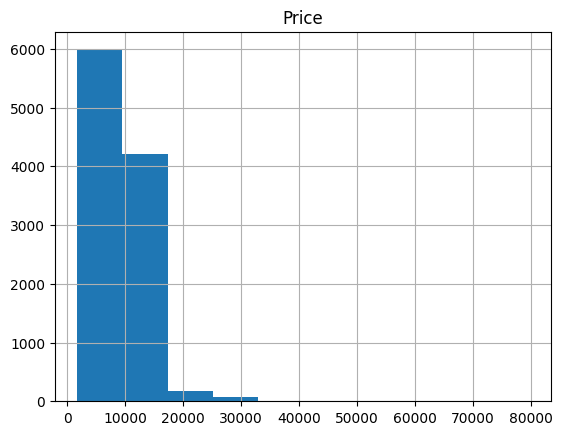

In [ ]:
#Visualizes the distribution of ticket prices using a histogram and a boxplot to identify outliers.
df_flights.hist('Price')

<Axes: xlabel='Price'>

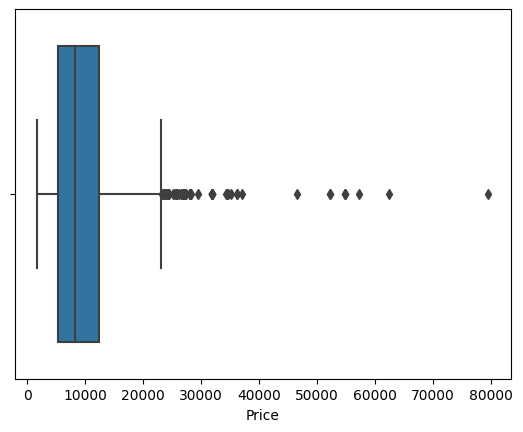

In [ ]:
sns.boxplot(x=df_flights["Price"])

### We filter out the outliers.

In [ ]:
#Filters out rows where the ticket price is greater than 30,000 to focus on a more typical range of data.
df_flights[df_flights['Price'] > 30_000].shape

(24, 17)

In [ ]:
df_flights = df_flights[df_flights['Price'] <= 30_000]

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

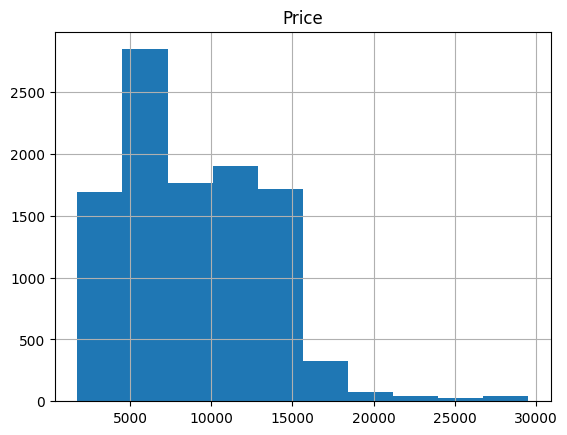

In [ ]:
df_flights.hist('Price')

### We continue to observe that the price is affected by a distribution skewed to the right; therefore, it is recommended to normalize it so that it follows a normal distribution.

In [ ]:
df_flights["Log_Price"]=np.log10(df_flights["Price"])

array([[<Axes: title={'center': 'Log_Price'}>]], dtype=object)

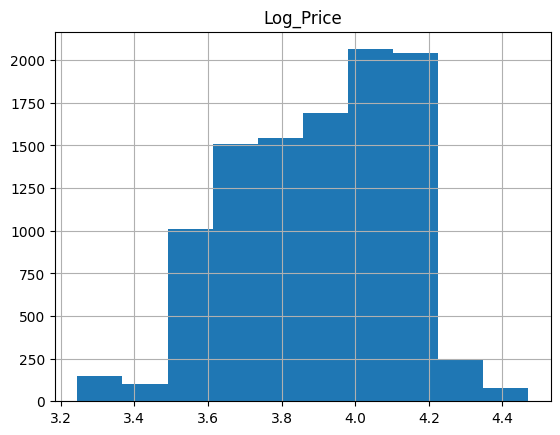

In [ ]:
df_flights.hist('Log_Price')

<Axes: xlabel='Log_Price'>

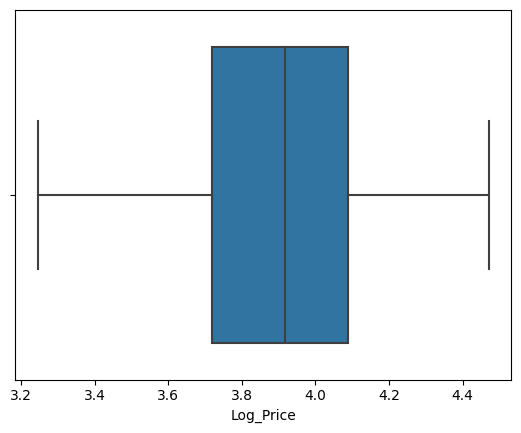

In [ ]:
sns.boxplot(x=df_flights["Log_Price"])

### **YEAR**

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

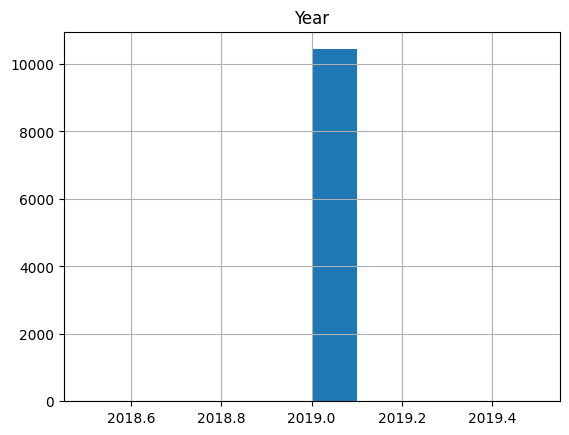

In [ ]:
df_flights.hist('Year')

### **MONTH**

array([[<Axes: title={'center': 'Month'}>]], dtype=object)

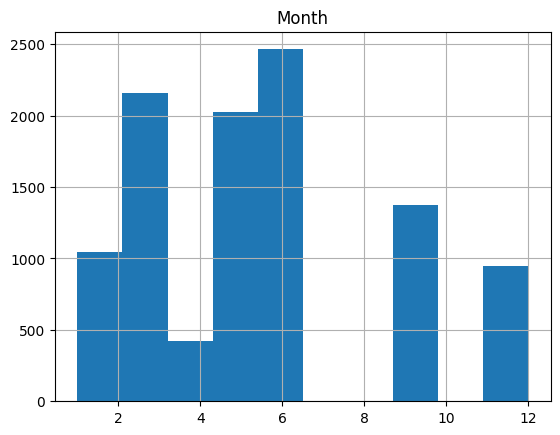

In [ ]:
df_flights.hist('Month')

In [ ]:
df_flights['Month'].unique()

array([ 1,  3,  4,  5,  6,  9, 12])

### **DURATION TOTAL**

array([[<Axes: title={'center': 'Duration_total'}>]], dtype=object)

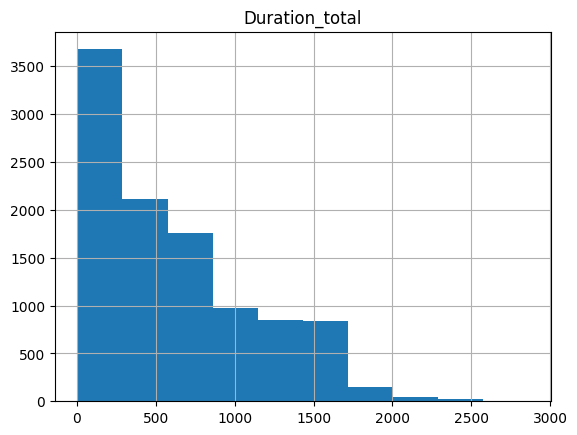

In [ ]:
 df_flights.hist('Duration_total')

<Axes: xlabel='Duration_total'>

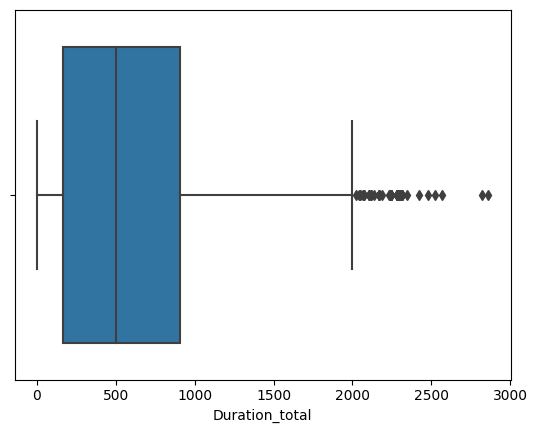

In [ ]:
sns.boxplot(x=df_flights["Duration_total"])

In [ ]:
df_flights[df_flights['Duration_total'] > 2_500].shape

(4, 18)

### We filter out the outliers.

In [ ]:
df_flights = df_flights[df_flights['Duration_total'] <= 2_500]

# 8. Correlation Between Variables

In [ ]:
#Computes the correlation matrix for numeric columns and visualizes it with a color gradient to highlight strong correlations.
corr = df_flights.corr(numeric_only=True)

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Price,Year,Month,Day,Dep_hour,Dep_minute,Duration_hour,Duration_minutes,Duration_total,Log_Price
Price,1.000000,nan,0.029345,-0.169376,-0.000010,-0.037431,0.546708,-0.139103,0.544183,0.960000
Year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Month,0.029345,nan,1.000000,-0.268425,0.029757,0.004033,0.057567,-0.021809,0.057059,0.053461
Day,-0.169376,nan,-0.268425,1.000000,-0.007019,-0.012995,-0.046924,-0.007768,-0.047373,-0.146913
Dep_hour,-0.000010,nan,0.029757,-0.007019,1.000000,-0.015434,0.000093,-0.019443,-0.000564,-0.010511
Dep_minute,-0.037431,nan,0.004033,-0.012995,-0.015434,1.000000,-0.021999,0.089296,-0.019069,-0.057757
Duration_hour,0.546708,nan,0.057567,-0.046924,0.000093,-0.021999,1.000000,-0.134377,0.999439,0.602884
Duration_minutes,-0.139103,nan,-0.021809,-0.007768,-0.019443,0.089296,-0.134377,1.000000,-0.101123,-0.149751
Duration_total,0.544183,nan,0.057059,-0.047373,-0.000564,-0.019069,0.999439,-0.101123,1.000000,0.600224
Log_Price,0.960000,nan,0.053461,-0.146913,-0.010511,-0.057757,0.602884,-0.149751,0.600224,1.000000


In [ ]:
df_flights.drop(columns = ['Duration_hour', 'Duration_minutes'], inplace = True)

# 8. Visualization of Prices by Destination and Source:

In [ ]:
#Creates violin plots to compare price distributions across different destinations and sources.
df_flights.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_hour,Dep_minute,Duration_total,Log_Price
0,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,13h 5m,1 stop,No info,26890,2019,1,3,11,40,785,4.429591
1,SpiceJet,2019-01-03,Banglore,New Delhi,15:35,8h 5m,1 stop,1 Long layover,7744,2019,1,3,15,35,485,3.888965
2,Jet Airways,2019-01-03,Banglore,New Delhi,8:00,12h 20m,1 stop,No info,27992,2019,1,3,8,0,740,4.447034
3,Air India,2019-01-03,Banglore,New Delhi,8:50,39h 5m,2 stops,No info,17135,2019,1,3,8,50,2345,4.233884
4,Jet Airways,2019-01-03,Banglore,New Delhi,11:40,23h 45m,1 stop,No info,25735,2019,1,3,11,40,1425,4.410524


<Axes: xlabel='Destination', ylabel='Price'>

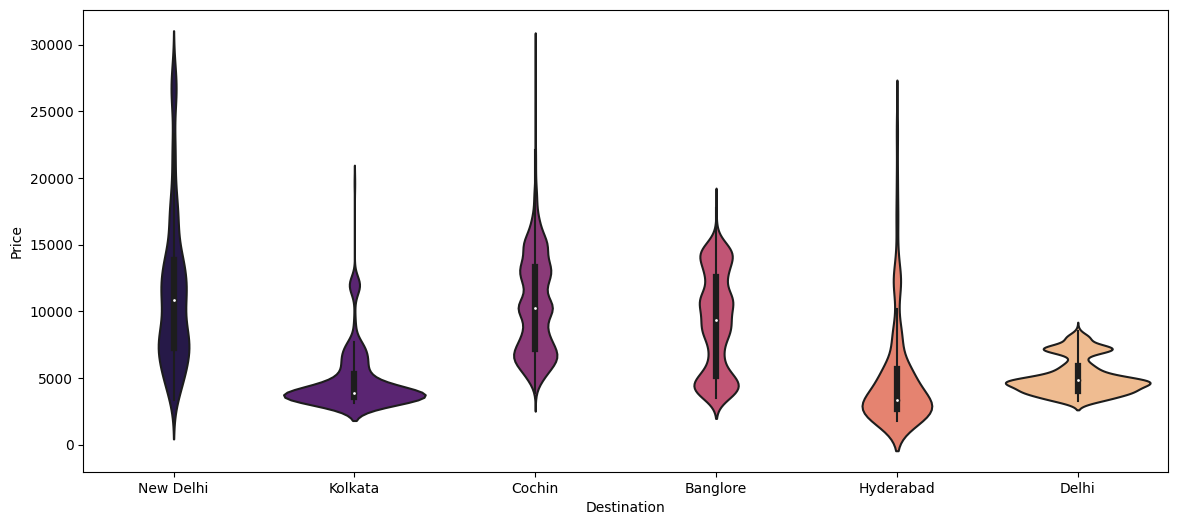

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x="Destination",y="Price", data=df_flights, palette="magma")

<Axes: xlabel='Source', ylabel='Price'>

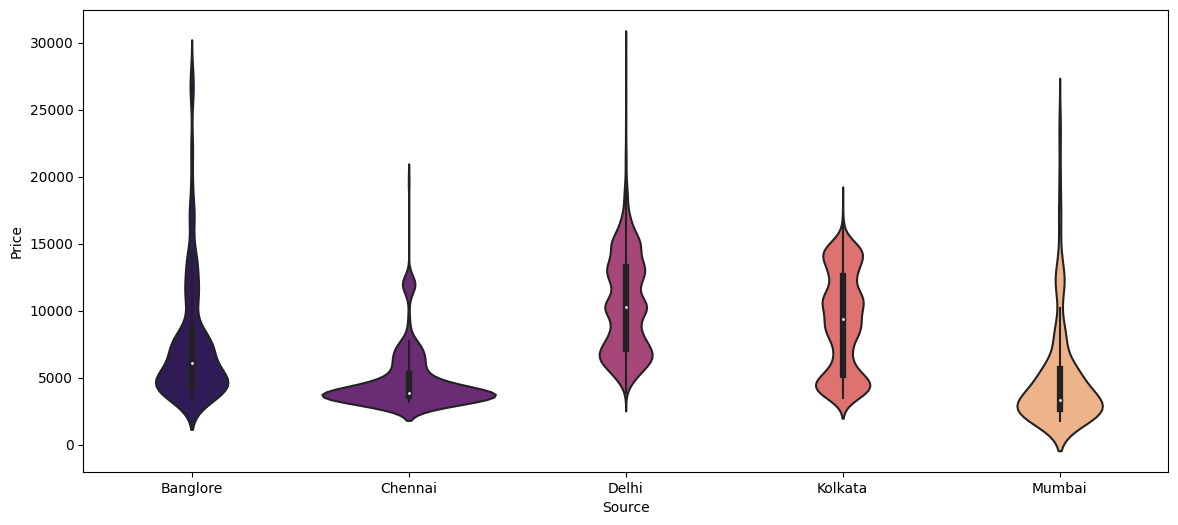

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x="Source",y="Price", data=df_flights, palette="magma")

## Analysis of Violin Plots

1. **Shape and Width**:
   - The width of each "violin" indicates the density of data points at different price levels, offering a clear visual of the price distribution within each category.
   - A wider section of a violin means a higher concentration of flights at that price range, while a narrower section indicates fewer flights.

2. **Peaks and Tails**:
   - Multiple peaks within a violin plot can suggest the presence of distinct subgroups within the category that might have different pricing structures. For example, business vs. economy class flights could form separate peaks.
   - Long tails, either at the higher or lower end of the plot, can indicate outliers or extreme values such as unusually expensive or cheap flights.

3. **Comparison Across Categories**:
   - By comparing the shapes of the violins across different destinations or sources, one can identify which locations tend to have higher or more variable prices. This can be insightful for determining pricing strategies or promotional focuses.
   - Consistently low prices for certain destinations might indicate high competition or lower costs, whereas higher prices could suggest exclusivity or less competition.

4. **Symmetry**:
   - Symmetrical violins suggest a more uniform distribution around the median, while asymmetry (where one half of the violin is thicker than the other) can indicate skewed data. Skewness towards higher prices can often be seen in flights to luxury destinations or from high-cost airports.

5. **Practical Implications for Business**:
   - Understanding these patterns helps airlines and travel agencies to tailor their pricing strategies according to consumer demand and competition.
   - They can also adjust marketing efforts to target specific traveler groups more likely to fly to or from these destinations, maximizing revenue and improving customer satisfaction.